# 스포츠 용품 RFM 분석

### RFM 분석
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

In [1]:
import pandas as pd

* 고객
> 고객 키 - 고객 ID  
FirstName - 고객 이름  
성 - 고객의 성  
전체 이름 - 고객의 전체 이름  
Birth Date - 생년월일  
결혼 상태 - 결혼 상태  
성별 - 성별  
연간 소득 - 연 소득  
Total Children - 총 자녀 수  
Number ChildrenAt Home - 집에 있는 자녀 수  
Education - 고객 교육  
직업 - 고객의 직업  
House Owner Flag - 부동산(집)의 가용성  
Number Cars Own - 소유한 자동차 수  
AddressLine1 - 고객의 거주지 주소  
날짜 첫 구매 - 첫 구매 날짜  
통근 거리 - 이동 거리  
고객 도시 - 고객의 도시  
고객 주 코드 - 고객의 주(지역) 코드  
고객 주 - 고객의 주(지역)  
고객 국가 - 고객 국가

* 판매 데이터
> ProductKey - 제품 ID  
OrderDate - 주문 날짜  
ShipDate - 배송 날짜  
CustomerKey - 고객 ID  
PromotionKey - 광고 키  
SalesTerritoryKey - 판매자 ID  
SalesOrderNumber - 등록 키  
SalesOrderLineNumber - 주문 번호  
OrderQuantity - 주문 수량  
UnitPrice - 상품 1개당 가격  
TotalProductCost - 총 생산 비용  
SalesAmount - 판매액  
TaxAmt - 세액

#### ✏️ 기획
1. 고객 별 등급 분포 분석

2. 등급 별 소비액, 구입 품목, 활동석 분석

3. 상품 판매량 분석

### Ⅰ. 데이터 탐색

In [2]:
# 판매 데이터 호출
sa_df = pd.read_csv("./datasets/rfm/Sales.csv")
sa_df

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,"1,789.14","2,171.29","3,578.27",286.26
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,"1,700.00","1,912.15","3,399.99",272.00
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,"1,700.00","1,912.15","3,399.99",272.00
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.55,413.15,699.10,55.93
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,"1,700.00","1,912.15","3,399.99",272.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58184,561,2016-12-30,2017-01-07,13650,1,9,SO74145,1,1,"2,384.07","1,481.94","2,384.07",190.73
58185,584,2016-12-30,2017-01-07,26916,1,9,SO74146,1,1,539.99,343.65,539.99,43.20
58186,605,2016-12-30,2017-01-07,27473,1,9,SO74147,1,1,539.99,343.65,539.99,43.20
58187,538,2016-12-30,2017-01-07,27473,1,9,SO74147,2,1,21.49,8.04,21.49,1.72


#### 📊 데이터 정보 확인

In [3]:
# sa_df 정보 가져오기
sa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductKey            58189 non-null  int64  
 1   OrderDate             58189 non-null  object 
 2   ShipDate              58189 non-null  object 
 3   CustomerKey           58189 non-null  int64  
 4   PromotionKey          58189 non-null  int64  
 5   SalesTerritoryKey     58189 non-null  int64  
 6   SalesOrderNumber      58189 non-null  object 
 7   SalesOrderLineNumber  58189 non-null  int64  
 8   OrderQuantity         58189 non-null  int64  
 9   UnitPrice             58189 non-null  object 
 10  TotalProductCost      58189 non-null  object 
 11  SalesAmount           58189 non-null  object 
 12  TaxAmt                58189 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 5.8+ MB


#### 📊 결측치 데이터 확인

In [4]:
# 결측치 데이터 개수 확인
sa_df.isna().sum()

ProductKey              0
OrderDate               0
ShipDate                0
CustomerKey             0
PromotionKey            0
SalesTerritoryKey       0
SalesOrderNumber        0
SalesOrderLineNumber    0
OrderQuantity           0
UnitPrice               0
TotalProductCost        0
SalesAmount             0
TaxAmt                  0
dtype: int64

#### ❓ 가설
- 환불된 주문 데이터가 있을까? (음수)

#### 📊 이상 데이터 확인

In [5]:
# 실수에서 정수 타입으로 변환
sa_df['SalesAmount'] = sa_df['SalesAmount'].str.replace(',', '').astype(float)

In [6]:
# 음수 데이터(환불) 존재 여부 확인
sa_df[sa_df['SalesAmount'] <= 0]

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt


#### 📊 불필요한 피처 삭제

In [7]:
# 불필요한 피처 삭제
sa_up_df = sa_df.drop(labels=['ShipDate', 'SalesOrderLineNumber', 'UnitPrice'], axis=1)
sa_up_df

,ProductKey,OrderDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,OrderQuantity,TotalProductCost,SalesAmount,TaxAmt
0,310,2014-01-01,21768,1,6,SO43697,2,"2,171.29",3578.27,286.26
1,346,2014-01-01,28389,1,7,SO43698,2,"1,912.15",3399.99,272.00
2,346,2014-01-01,25863,1,1,SO43699,2,"1,912.15",3399.99,272.00
3,336,2014-01-01,14501,1,4,SO43700,2,413.15,699.10,55.93
4,346,2014-01-01,11003,1,9,SO43701,2,"1,912.15",3399.99,272.00
...,...,...,...,...,...,...,...,...,...,...
58184,561,2016-12-30,13650,1,9,SO74145,1,"1,481.94",2384.07,190.73
58185,584,2016-12-30,26916,1,9,SO74146,1,343.65,539.99,43.20
58186,605,2016-12-30,27473,1,9,SO74147,1,343.65,539.99,43.20
58187,538,2016-12-30,27473,1,9,SO74147,1,8.04,21.49,1.72


#### 📊 중복행 검사

In [8]:
# 중복행 데이터 개수 확인
sa_up_df.duplicated().sum()

0

In [9]:
# 회원 데이터 호출
cu_df = pd.read_csv("./datasets/rfm/Customer.csv")
cu_df

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,...,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,CustomerCity,CustomerStateCode,CustomerState,CustomerCountry
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,...,Professional,1,0,3761 N. 14th St,2005-07-22,1-2 Miles,Rockhampton,QLD,Queensland,Australia
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,...,Professional,0,1,2243 W St.,2005-07-18,0-1 Miles,Seaford,VIC,Victoria,Australia
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,...,Professional,1,1,5844 Linden Land,2005-07-10,2-5 Miles,Hobart,TAS,Tasmania,Australia
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,...,Professional,0,1,1825 Village Pl.,2005-07-01,5-10 Miles,North Ryde,NSW,New South Wales,Australia
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,...,Professional,1,4,7553 Harness Circle,2005-07-26,1-2 Miles,Wollongong,NSW,New South Wales,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,Tommy,Tang,"Tang, Tommy",1958-07-04,M,M,30000,1,0,...,Clerical,1,0,"111, rue Maillard",2007-03-08,0-1 Miles,Versailles,78,Yveline,France
18480,29480,Nina,Raji,"Raji, Nina",1960-11-10,S,F,30000,3,0,...,Clerical,1,0,9 Katherine Drive,2008-01-18,0-1 Miles,London,ENG,England,United Kingdom
18481,29481,Ivan,Suri,"Suri, Ivan",1960-01-05,S,M,30000,3,0,...,Clerical,0,0,Knaackstr 4,2006-02-13,0-1 Miles,Hof,BY,Bayern,Germany
18482,29482,Clayton,Zhang,"Zhang, Clayton",1959-03-05,M,M,30000,3,0,...,Clerical,1,0,"1080, quai de Grenelle",2007-03-22,0-1 Miles,Saint Ouen,17,Charente-Maritime,France


#### 📊 데이터 정보 확인

In [10]:
# cu_df 정보 가져오기
cu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerKey           18484 non-null  int64 
 1   FirstName             18484 non-null  object
 2   LastName              18484 non-null  object
 3   FullName              18484 non-null  object
 4   BirthDate             18484 non-null  object
 5   MaritalStatus         18484 non-null  object
 6   Gender                18484 non-null  object
 7   YearlyIncome          18484 non-null  int64 
 8   TotalChildren         18484 non-null  int64 
 9   NumberChildrenAtHome  18484 non-null  int64 
 10  Education             18484 non-null  object
 11  Occupation            18484 non-null  object
 12  HouseOwnerFlag        18484 non-null  int64 
 13  NumberCarsOwned       18484 non-null  int64 
 14  AddressLine1          18484 non-null  object
 15  DateFirstPurchase     18484 non-null

#### 📊 결측치 데이터 확인

In [11]:
# 결측치 데이터 개수 확인
cu_df.isna().sum()

CustomerKey             0
FirstName               0
LastName                0
FullName                0
BirthDate               0
MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
Education               0
Occupation              0
HouseOwnerFlag          0
NumberCarsOwned         0
AddressLine1            0
DateFirstPurchase       0
CommuteDistance         0
CustomerCity            0
CustomerStateCode       0
CustomerState           0
CustomerCountry         0
dtype: int64

In [12]:
cu_df['CustomerCountry'].value_counts()

CustomerCountry
United States     7819
Australia         3591
United Kingdom    1913
France            1810
Germany           1780
Canada            1571
Name: count, dtype: int64

### Ⅱ. 데이터 전처리

#### 📊 OrderDate 현재 기준으로 변경

In [13]:
# 날짜 데이터 datetime 형식 변환
sa_up_df['OrderDate'] = pd.to_datetime(sa_up_df['OrderDate'])

In [14]:
sa_date_df = sa_up_df.copy()

# 데이터 중 가장 최신 날짜 가져오기
recently_date = pd.to_datetime(sa_up_df['OrderDate'].max())
print(recently_date)

# 날짜 현재 기준으로 변경하기
sa_up_df['OrderDate'] = (recently_date - pd.to_datetime(sa_up_df['OrderDate'])).dt.days

# 날짜 오름차순 정렬(최신순)
sa_up_df = sa_up_df.sort_values(by=['OrderDate'], ascending = True).reset_index(drop=True)
sa_up_df

2016-12-30 00:00:00


,ProductKey,OrderDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,OrderQuantity,TotalProductCost,SalesAmount,TaxAmt
0,490,0,27473,1,9,SO74147,1,41.57,53.99,4.32
1,487,0,19918,1,10,SO74109,1,20.57,54.99,4.40
2,529,0,24727,1,1,SO74110,1,1.49,3.99,0.32
3,540,0,24727,1,1,SO74110,1,12.19,32.60,2.61
4,214,0,24727,1,1,SO74110,1,13.09,34.99,2.80
...,...,...,...,...,...,...,...,...,...,...
58184,346,1094,11003,1,9,SO43701,2,"1,912.15",3399.99,272.00
58185,336,1094,14501,1,4,SO43700,2,413.15,699.10,55.93
58186,346,1094,25863,1,1,SO43699,2,"1,912.15",3399.99,272.00
58187,346,1094,28389,1,7,SO43698,2,"1,912.15",3399.99,272.00


#### 📊 순이익 계산
※ 판매액 - (총 생산 비용 + 새액)

In [15]:
# 타입 변환

# 주문 수량
sa_up_df['OrderQuantity'] = sa_df['OrderQuantity'].astype(int)

# 총 생산 비용
sa_up_df['TotalProductCost'] = sa_df['TotalProductCost'].str.replace(',', '').astype(float)

# 판매액
sa_up_df['SalesAmount'] = sa_df['SalesAmount'].astype(float)

# 세액
sa_up_df['TaxAmt'] = sa_df['TaxAmt'].astype(float)

In [16]:
# 순이익 계산
SalesAmount = sa_up_df['SalesAmount']
TotalProductCost = sa_up_df['TotalProductCost']
TaxAmt = sa_up_df['TaxAmt']

sa_up_df['NetProfit'] = SalesAmount - (TotalProductCost + TaxAmt)

In [17]:
# 사용된 피처 삭제
sa_to_df = sa_up_df.drop(labels=['TotalProductCost', 'TaxAmt'], axis=1)
sa_to_df

,ProductKey,OrderDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,OrderQuantity,SalesAmount,NetProfit
0,490,0,27473,1,9,SO74147,2,3578.27,1120.72
1,487,0,19918,1,10,SO74109,2,3399.99,1215.84
2,529,0,24727,1,1,SO74110,2,3399.99,1215.84
3,540,0,24727,1,1,SO74110,2,699.10,230.02
4,214,0,24727,1,1,SO74110,2,3399.99,1215.84
...,...,...,...,...,...,...,...,...,...
58184,346,1094,11003,1,9,SO43701,1,2384.07,711.40
58185,336,1094,14501,1,4,SO43700,1,539.99,153.14
58186,346,1094,25863,1,1,SO43699,1,539.99,153.14
58187,346,1094,28389,1,7,SO43698,1,21.49,11.73


In [18]:
sa_date_df = sa_date_df[['OrderDate', 'SalesOrderNumber']]
sa_date_df = sa_date_df.rename(columns={'OrderDate': 'Date'})
merged_date_df = pd.merge(sa_to_df, sa_date_df, on='SalesOrderNumber')
merged_date_df

,ProductKey,OrderDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,OrderQuantity,SalesAmount,NetProfit,Date
0,490,0,27473,1,9,SO74147,2,3578.27,1120.72,2016-12-30
1,490,0,27473,1,9,SO74147,2,3578.27,1120.72,2016-12-30
2,490,0,27473,1,9,SO74147,2,3578.27,1120.72,2016-12-30
3,538,0,27473,1,9,SO74147,1,3374.99,1206.90,2016-12-30
4,538,0,27473,1,9,SO74147,1,3374.99,1206.90,2016-12-30
...,...,...,...,...,...,...,...,...,...,...
161464,346,1094,11003,1,9,SO43701,1,2384.07,711.40,2014-01-01
161465,336,1094,14501,1,4,SO43700,1,539.99,153.14,2014-01-01
161466,346,1094,25863,1,1,SO43699,1,539.99,153.14,2014-01-01
161467,346,1094,28389,1,7,SO43698,1,21.49,11.73,2014-01-01


#### 📊 Recency
※ 얼마나 최근에 구매했는가

In [19]:
# 회원 별 최근 결제 일자 가져오기
sa_new_df = sa_to_df.groupby('CustomerKey')['OrderDate'].min().reset_index(name='RecentlyDate')
sa_new_df

,CustomerKey,RecentlyDate
0,11000,240
1,11001,18
2,11002,307
3,11003,233
4,11004,242
...,...,...
17913,29479,479
17914,29480,165
17915,29481,870
17916,29482,465


#### 📊 Frequency
※ 얼마나 자주 구매했는가

In [20]:
# 회원 별 주문 횟수 가져오기 (고유한 개수 세기)
sa_new_df['OrderCount'] = sa_to_df.groupby('CustomerKey')['SalesOrderNumber'].nunique().reset_index()['SalesOrderNumber']
sa_new_df

,CustomerKey,RecentlyDate,OrderCount
0,11000,240,3
1,11001,18,3
2,11002,307,3
3,11003,233,3
4,11004,242,3
...,...,...,...
17913,29479,479,1
17914,29480,165,1
17915,29481,870,1
17916,29482,465,1


#### 📊 Monetary

In [21]:
# 회원 별 총 주문 금액 가져오기
sa_new_df['TotalPirce'] = sa_to_df.groupby('CustomerKey')['SalesAmount'].sum().reset_index()['SalesAmount']
sa_new_df

,CustomerKey,RecentlyDate,OrderCount,TotalPirce
0,11000,240,3,2392.22
1,11001,18,3,12683.73
2,11002,307,3,1257.12
3,11003,233,3,7283.45
4,11004,242,3,2897.43
...,...,...,...,...
17913,29479,479,1,4.99
17914,29480,165,1,3609.82
17915,29481,870,1,1700.99
17916,29482,465,1,24.49


In [22]:
# 중복값 검사
sa_new_df.duplicated().sum()

0

### Ⅲ. 정규화

In [23]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 프레임 복사
rfm = sa_new_df.copy()
# CustomerKey 피처 삭제
rfm = rfm.drop(labels=['CustomerKey'], axis=1)

# 정규화 진행
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(rfm)

# 정규화된 데이터를 데이터 프레임으로 변환, 피처는 rfm 데이터 프레임과 동일하게 설정
rfm = pd.DataFrame(rfm_normalization, columns=rfm.columns)

# recently_mean_date는 현재 낮을 수록 최신에 가깝고, 최신 점수가 더 높아야 하기 때문에 1을 빼서 점수를 높여준다.
rfm['RecentlyDate'] = 1 - rfm['RecentlyDate']

# rfm을 더하여 TotalScore 구하기
sa_new_df['TotalScore'] = rfm[['RecentlyDate', 'OrderCount', 'TotalPirce']].sum(axis=1)
sa_new_df

,CustomerKey,RecentlyDate,OrderCount,TotalPirce,TotalScore
0,11000,240,3,2392.22,0.927514
1,11001,18,3,12683.73,1.418489
2,11002,307,3,1257.12,0.834500
3,11003,233,3,7283.45,1.070813
4,11004,242,3,2897.43,0.939826
...,...,...,...,...,...
17913,29479,479,1,4.99,0.562233
17914,29480,165,1,3609.82,0.950149
17915,29481,870,1,1700.99,0.252298
17916,29482,465,1,24.49,0.575576


In [24]:
import numpy as np

# 회원 등급 책정을 위해 백분위수 계산
# 각 백분위 수는 각 변수에 할당
l1, l2, l3, l4 = np.percentile(sa_new_df['TotalScore'], [30, 50, 75, 95])
print(l1, l2, l3, l4)

0.8350381152124705 0.909727953360486 0.9929670474350286 1.1984128325469114


In [25]:
# 회원의 등급 책정을 위한 함수 선언
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [26]:
# 데이터 프레임에 Level 피처 추가(각 회원 등급 추가)
sa_new_df['Level'] = sa_new_df['TotalScore'].apply(get_level)
sa_new_df

,CustomerKey,RecentlyDate,OrderCount,TotalPirce,TotalScore,Level
0,11000,240,3,2392.22,0.927514,3
1,11001,18,3,12683.73,1.418489,1
2,11002,307,3,1257.12,0.834500,5
3,11003,233,3,7283.45,1.070813,2
4,11004,242,3,2897.43,0.939826,3
...,...,...,...,...,...,...
17913,29479,479,1,4.99,0.562233,5
17914,29480,165,1,3609.82,0.950149,3
17915,29481,870,1,1700.99,0.252298,5
17916,29482,465,1,24.49,0.575576,5


In [27]:
# 각 등급의 데이터 값의 이름을 바꿔주기
sa_new_df['Level'] = sa_new_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
sa_new_df

,CustomerKey,RecentlyDate,OrderCount,TotalPirce,TotalScore,Level
0,11000,240,3,2392.22,0.927514,Gold
1,11001,18,3,12683.73,1.418489,VIP
2,11002,307,3,1257.12,0.834500,Bronze
3,11003,233,3,7283.45,1.070813,Diamond
4,11004,242,3,2897.43,0.939826,Gold
...,...,...,...,...,...,...
17913,29479,479,1,4.99,0.562233,Bronze
17914,29480,165,1,3609.82,0.950149,Gold
17915,29481,870,1,1700.99,0.252298,Bronze
17916,29482,465,1,24.49,0.575576,Bronze


#### 📊 등급 별 구입 품목

In [28]:
# 형변환 하기
sa_to_df['ProductKey'] = sa_to_df['ProductKey'].astype(str)

# 등급 별 총 구입 품목 확인
sa_new_df['ProductKey'] = sa_to_df.groupby('CustomerKey')['ProductKey'].apply(lambda x: ', '.join(x)).reset_index()['ProductKey']
sa_new_df

# Product_Code를 ','를 기준으로 분할하여 리스트로 변환하는 함수
def count_product(group):
    codes = group['ProductKey'].str.split(', ')
    # 각 그룹별로 Product_Code의 개수를 세기
    return pd.Series([len(codes) for codes in codes])

# Level로 그룹화하고 각 그룹에 대해 Product_Code의 개수를 세는 함수를 적용
level_product_counts = sa_new_df.groupby('Level').apply(count_product).reset_index()
level_product_counts.columns = ['Level', 'ProductKey', 'ProductKeyCount']

display(level_product_counts)

,Level,ProductKey,ProductKeyCount
0,Bronze,0,4
1,Bronze,1,7
2,Bronze,2,4
3,Bronze,3,2
4,Bronze,4,3
...,...,...,...
17913,VIP,888,2
17914,VIP,889,4
17915,VIP,890,3
17916,VIP,891,4


In [29]:
# 전체 상품
all_df = level_product_counts.groupby('ProductKey')['ProductKeyCount'].sum().reset_index()

# 상위/하위 5개 상품
top_all_df = all_df.nlargest(5, 'ProductKeyCount')
bottom_all_df = all_df.nsmallest(5, 'ProductKeyCount')

# 브론즈 상품
bronze_df = level_product_counts[level_product_counts['Level'] == 'Bronze']

# 등급별로 상위/하위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_bronze_df = bronze_df.groupby('Level').apply(lambda x: x.nlargest(5, 'ProductKeyCount'))
bottom_bronze_df = bronze_df.groupby('Level').apply(lambda x: x.nsmallest(5, 'ProductKeyCount'))

# 실버 상품
silver_df = level_product_counts[level_product_counts['Level'] == 'Silver']

# 등급별로 상위/하위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_silver_df = silver_df.groupby('Level').apply(lambda x: x.nlargest(5, 'ProductKeyCount'))
bottom_silver_df = silver_df.groupby('Level').apply(lambda x: x.nsmallest(5, 'ProductKeyCount'))

# 골드 상품
gold_df = level_product_counts[level_product_counts['Level'] == 'Gold']

# 등급별로 상위/하위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_gold_df = gold_df.groupby('Level').apply(lambda x: x.nlargest(5, 'ProductKeyCount'))
bottom_gold_df = gold_df.groupby('Level').apply(lambda x: x.nsmallest(5, 'ProductKeyCount'))

# 다이아몬드 상품
diamond_df = level_product_counts[level_product_counts['Level'] == 'Diamond']

# 등급별로 상위/하위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_diamond_df = diamond_df.groupby('Level').apply(lambda x: x.nlargest(5, 'ProductKeyCount'))
bottom_diamond_df = diamond_df.groupby('Level').apply(lambda x: x.nsmallest(5, 'ProductKeyCount'))

# 브이아이피 상품
vip_df = level_product_counts[level_product_counts['Level'] == 'VIP']

# 등급별로 상위/하위 5개의 상품 선택(nlargest: 가장 큰 값 가져와줌)(nsmallest: 가장 작은 값 가져와줌)
top_vip_df = vip_df.groupby('Level').apply(lambda x: x.nlargest(5, 'ProductKeyCount'))
bottom_vip_df = vip_df.groupby('Level').apply(lambda x: x.nsmallest(5, 'ProductKeyCount'))

In [30]:
# 국가별 대륙 매핑 딕셔너리 생성
country_to_continent = {
    'United States': 'North America',
    'Canada': 'North America',
    'Australia': 'Oceania',
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe'
}

# 대륙 컬럼 추가
cu_df['Continent'] = cu_df['CustomerCountry'].map(country_to_continent)

# 결과 확인
cu_df

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,...,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,CustomerCity,CustomerStateCode,CustomerState,CustomerCountry,Continent
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,...,1,0,3761 N. 14th St,2005-07-22,1-2 Miles,Rockhampton,QLD,Queensland,Australia,Oceania
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,...,0,1,2243 W St.,2005-07-18,0-1 Miles,Seaford,VIC,Victoria,Australia,Oceania
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,...,1,1,5844 Linden Land,2005-07-10,2-5 Miles,Hobart,TAS,Tasmania,Australia,Oceania
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,...,0,1,1825 Village Pl.,2005-07-01,5-10 Miles,North Ryde,NSW,New South Wales,Australia,Oceania
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,...,1,4,7553 Harness Circle,2005-07-26,1-2 Miles,Wollongong,NSW,New South Wales,Australia,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,29479,Tommy,Tang,"Tang, Tommy",1958-07-04,M,M,30000,1,0,...,1,0,"111, rue Maillard",2007-03-08,0-1 Miles,Versailles,78,Yveline,France,Europe
18480,29480,Nina,Raji,"Raji, Nina",1960-11-10,S,F,30000,3,0,...,1,0,9 Katherine Drive,2008-01-18,0-1 Miles,London,ENG,England,United Kingdom,Europe
18481,29481,Ivan,Suri,"Suri, Ivan",1960-01-05,S,M,30000,3,0,...,0,0,Knaackstr 4,2006-02-13,0-1 Miles,Hof,BY,Bayern,Germany,Europe
18482,29482,Clayton,Zhang,"Zhang, Clayton",1959-03-05,M,M,30000,3,0,...,1,0,"1080, quai de Grenelle",2007-03-22,0-1 Miles,Saint Ouen,17,Charente-Maritime,France,Europe


### Ⅳ. 분석

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [33]:
sa_to_df

,ProductKey,OrderDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,OrderQuantity,SalesAmount,NetProfit
0,490,0,27473,1,9,SO74147,2,3578.27,1120.72
1,487,0,19918,1,10,SO74109,2,3399.99,1215.84
2,529,0,24727,1,1,SO74110,2,3399.99,1215.84
3,540,0,24727,1,1,SO74110,2,699.10,230.02
4,214,0,24727,1,1,SO74110,2,3399.99,1215.84
...,...,...,...,...,...,...,...,...,...
58184,346,1094,11003,1,9,SO43701,1,2384.07,711.40
58185,336,1094,14501,1,4,SO43700,1,539.99,153.14
58186,346,1094,25863,1,1,SO43699,1,539.99,153.14
58187,346,1094,28389,1,7,SO43698,1,21.49,11.73


In [34]:
sa_new_df

,CustomerKey,RecentlyDate,OrderCount,TotalPirce,TotalScore,Level,ProductKey
0,11000,240,3,2392.22,0.927514,Gold,"488, 530, 541, 573, 214, 485, 353, 344"
1,11001,18,3,12683.73,1.418489,VIP,"479, 217, 604, 477, 353, 485, 477, 478, 491, 2..."
2,11002,307,3,1257.12,0.834500,Bronze,"561, 222, 359, 346"
3,11003,233,3,7283.45,1.070813,Diamond,"564, 541, 530, 480, 361, 478, 477, 225, 346"
4,11004,242,3,2897.43,0.939826,Gold,"562, 217, 485, 214, 355, 345"
...,...,...,...,...,...,...,...
17913,29479,479,1,4.99,0.562233,Bronze,358
17914,29480,165,1,3609.82,0.950149,Gold,"225, 217, 477, 479, 562"
17915,29481,870,1,1700.99,0.252298,Bronze,349
17916,29482,465,1,24.49,0.575576,Bronze,358


#### 📊 고객 거주 지역 분석

In [35]:
cu_con_df = pd.DataFrame(cu_df['Continent'].value_counts()).reset_index()
cu_con_df

,Continent,count
0,North America,9390
1,Europe,5503
2,Oceania,3591


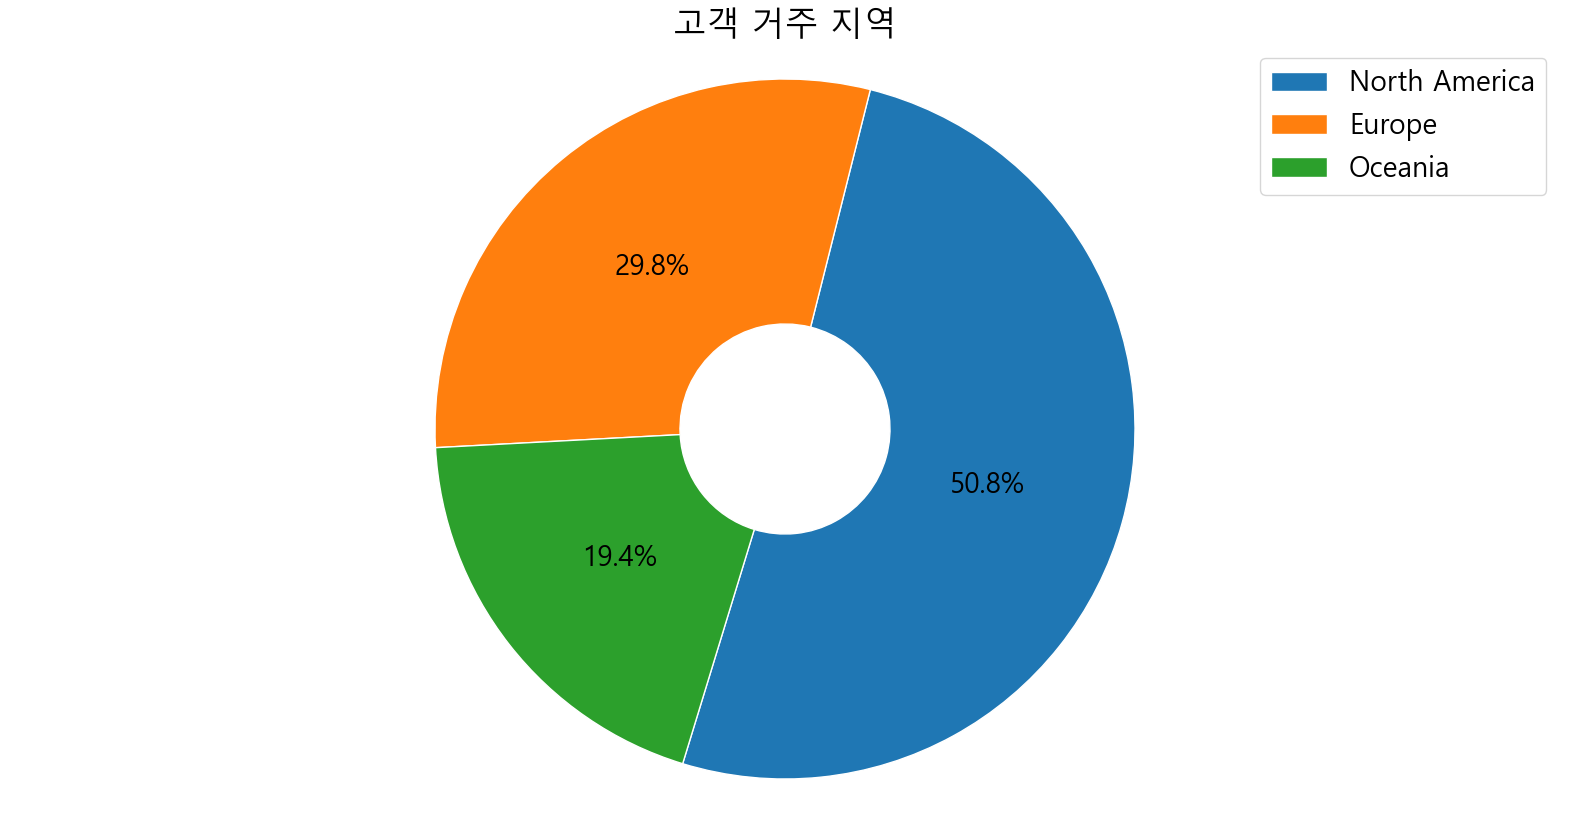

In [36]:
# 파이 차트 그리기
# 파이 차트 크기 설정
plt.figure(figsize=(20, 10))

# 부채꼴 스타일
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

labels = cu_con_df['Continent']
sizes = cu_con_df['count']

plt.rcParams['font.size'] = 20

# 파이 차트 그리기, autopct: 각 항목의 비율을 소수점 첫째자리까지 표시, 첫 번째 항목이 시작되는 각도, 부채꼴 스타일
patches, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', startangle=253, wedgeprops=wedgeprops) 

# 원형으로 설정
plt.axis('equal')
#파이 차트 제목 설정
plt.title('고객 거주 지역')
plt.legend(cu_con_df['Continent'])

plt.show()

#### 💡 분석
- 북아메리카 고객이 약 50.8%로 가장 많음.

#### 📌 시사점
- 북아메리카를 거점으로 성장하고 있으며, 유럽, 오세아니아 대륙으로도 수출되는 것으로 나타남.

#### 📊 고객 별 등급 분포 분석

In [37]:
# 등급 별 회원 명수 확인 
sa_new_df['Level'].value_counts()

Level
Bronze     5376
Gold       4479
Diamond    3587
Silver     3583
VIP         893
Name: count, dtype: int64

In [38]:
# 폰트 사이즈 조정
plt.rcParams['font.size'] = 12

<Axes: xlabel='Level', ylabel='count'>

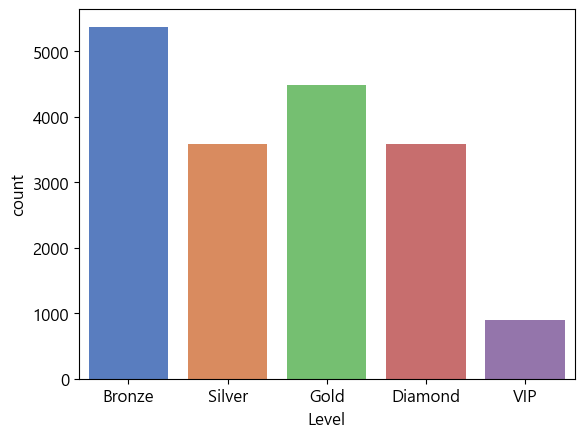

In [39]:
# 등급 별 고객수 도식화 하기
level_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 카테고리(측정불가 데이터)이기 때문에 countplot 사용
sns.countplot(x='Level', data=sa_new_df, palette='muted', order=level_columns)

#### 💡 분석
- 총 17918명의 고객을 보유함.
- 고객의 등급은 Bronze, Silver, Gold, Diamond, VIP 순으로 책정됨.
- Bronze 고객이 5376명으로 가장 많고, VIP 고객이 893명으로 가장 적음.

#### 📌 시사점
- Bronze 회원이 많이 나타나는 것으로 보아 신규 고객 유입이 잘 이루어지고 있다고 판단됨. 기존 고객을 유지할 수 있는 마케팅 전략이 필요함.
- 타 등급에 비해 VIP 고객이 적은 것으로 나타남. VIP 고객 유지 및 유입을 위한 마케팅 전략이 필요함.

#### 📊 등급 별 소비액

In [40]:
# 등급 별 총 소비액 확인
level_price_df = sa_new_df.groupby('Level').sum('TotalPirce').reset_index()
level_price_df

,Level,CustomerKey,RecentlyDate,OrderCount,TotalPirce,TotalScore
0,Bronze,116378141,1695649,6189,2627358.76,3931.759438
1,Diamond,66663630,191935,6683,10811722.95,3837.777110
2,Gold,89367059,460434,6546,4006525.47,4252.659913
3,Silver,73643928,629392,4751,2799861.19,3132.543315
4,VIP,16062331,11780,2514,9062368.89,1200.662446


In [41]:
level_price_df['TotalPirce'].sum()

29307837.26

<Axes: xlabel='Level', ylabel='TotalPirce'>

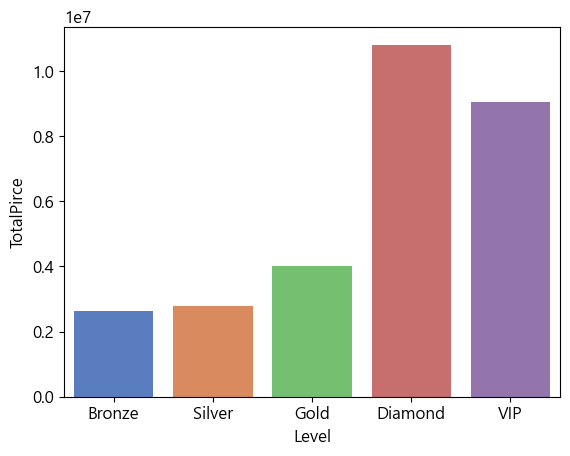

In [42]:
# 등급 별 총 소비액 도식화
level_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 수량 데이터(측정 가능) 데이터이기 때문에 barplot를 사용
sns.barplot(x='Level', y='TotalPirce', data=level_price_df, palette='muted', order=level_columns)

#### 💡 분석
- 총 매출액은 29,307,837달러로 나타남.
- Diamond 고객의 매출액이 10,811,722달러로 가장 높고, Bronze 고객의 매출액이 2,627,358달러로 가장 낮음.

#### 📌 시사점
- VIP 고객수가 가장 적음에도 해당 등급에서 두번째로 높은 매출액을 달성하였으며, VIP 고객의 이탈 시 총 매출액의 영향이 클 것으로 판단됨. VIP 고객 유지를 위한 마케팅 전략이 필요함.
- Bronze 고객수가 가장 많음에도 가장 낮은 매출액을 달성함. Bronze 고객을 대상으로한 마케팅 전략이 제대로 추진되지 않았다고 판단되며, Bronze 고객의 구매를 높이기 위한 마케팅 전략이 필요함.
- 외에도 매출액이 낮은 Silver, Gold 고객을 대상으로 하는 마케팅 전략이 필요하다 판단됨.

#### 📊 등급 별 상위 5개 제품 품목

,ProductKey,ProductKeyCount
16,16,82
40,40,81
43,43,79
8,8,78
42,42,76


,ProductKey,ProductKeyCount
4480,4480,1
4481,4481,1
4488,4488,1
4489,4489,1
4490,4490,1


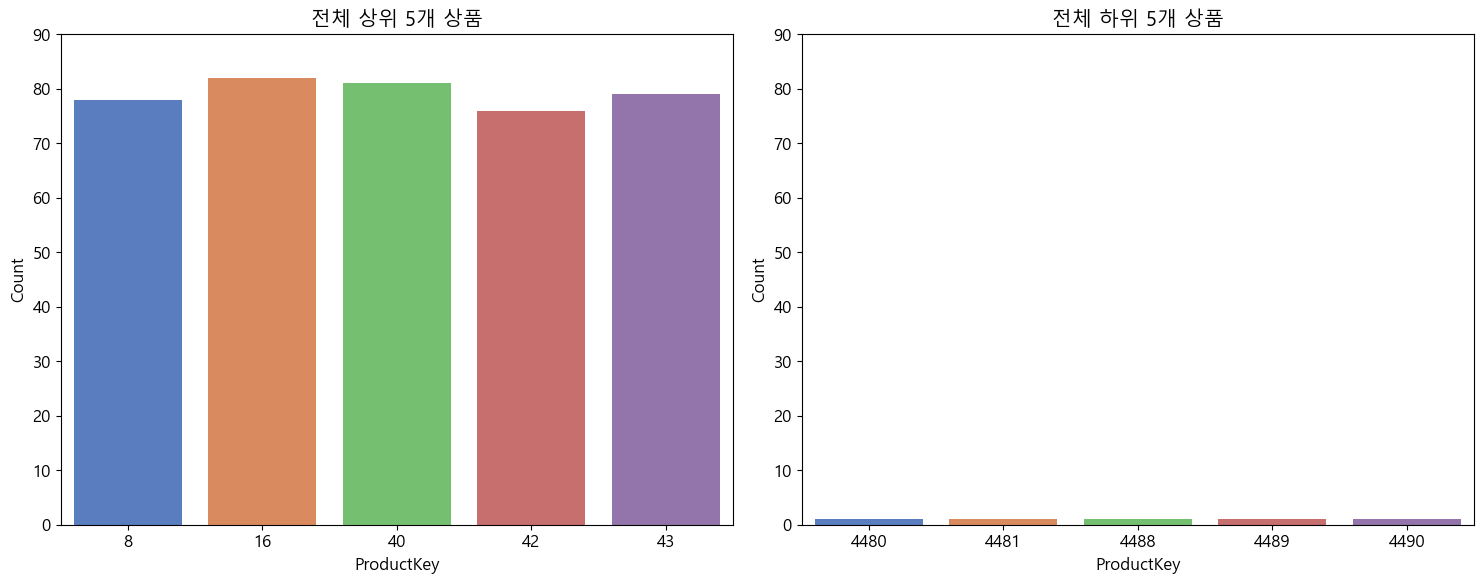

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plt.rcParams['font.size'] = 12

sns.barplot(x='ProductKey', y='ProductKeyCount', data=top_all_df, palette='muted', ax=axes[0])
axes[0].set_title('전체 상위 5개 상품')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, 90)
sns.barplot(x='ProductKey', y='ProductKeyCount', data=bottom_all_df, palette='muted', ax=axes[1])
axes[1].set_title('전체 하위 5개 상품')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, 90)

# 상위 5개 제품
display(top_all_df)
# 하위 5개 제품
display(bottom_all_df)

plt.tight_layout()
plt.show()

,Level,ProductKey,ProductKeyCount,Level,ProductKey,ProductKeyCount
0,Bronze,274,9,Bronze,24,1
1,Bronze,1,7,Bronze,25,1
2,Bronze,11,7,Bronze,26,1
3,Bronze,71,7,Bronze,35,1
4,Bronze,82,7,Bronze,38,1


,Level,ProductKey,ProductKeyCount,Level,ProductKey,ProductKeyCount
0,Silver,86,10,Silver,49,1
1,Silver,979,10,Silver,69,1
2,Silver,1067,10,Silver,71,1
3,Silver,1007,9,Silver,72,1
4,Silver,0,8,Silver,73,1


,Level,ProductKey,ProductKeyCount,Level,ProductKey,ProductKeyCount
0,Gold,63,13,Gold,47,1
1,Gold,1564,13,Gold,60,1
2,Gold,167,11,Gold,69,1
3,Gold,226,11,Gold,91,1
4,Gold,314,11,Gold,94,1


,Level,ProductKey,ProductKeyCount,Level,ProductKey,ProductKeyCount
0,Diamond,170,15,Diamond,126,1
1,Diamond,578,15,Diamond,138,1
2,Diamond,318,14,Diamond,146,1
3,Diamond,218,13,Diamond,151,1
4,Diamond,303,13,Diamond,153,1


,Level,ProductKey,ProductKeyCount,Level,ProductKey,ProductKeyCount
0,VIP,40,64,VIP,515,2
1,VIP,16,61,VIP,555,2
2,VIP,35,59,VIP,558,2
3,VIP,38,57,VIP,602,2
4,VIP,8,56,VIP,604,2


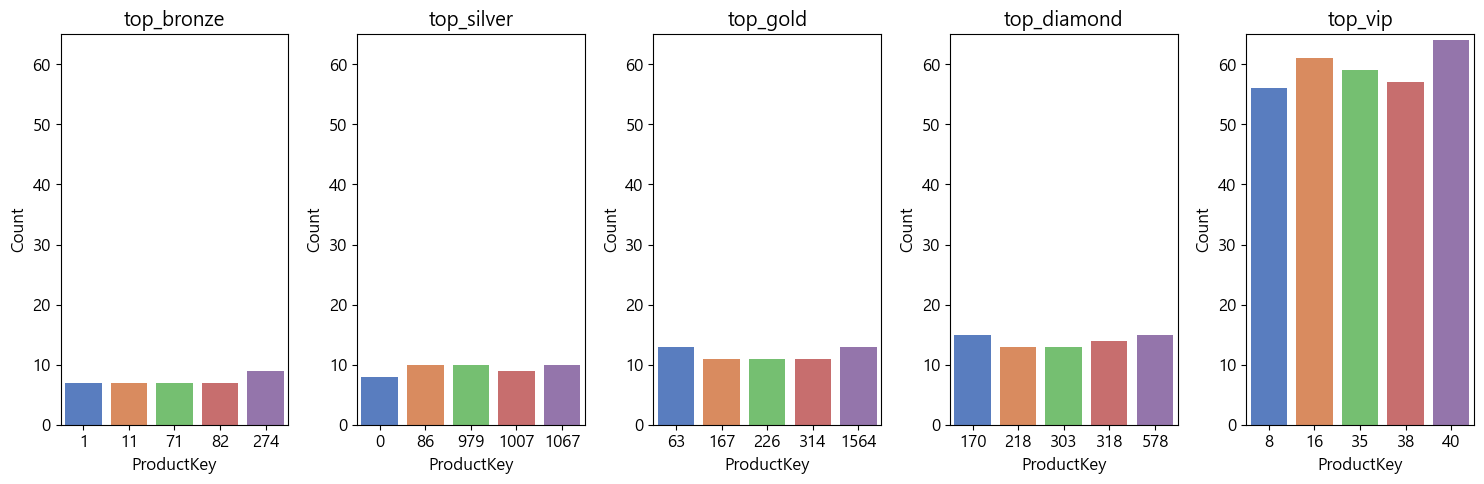

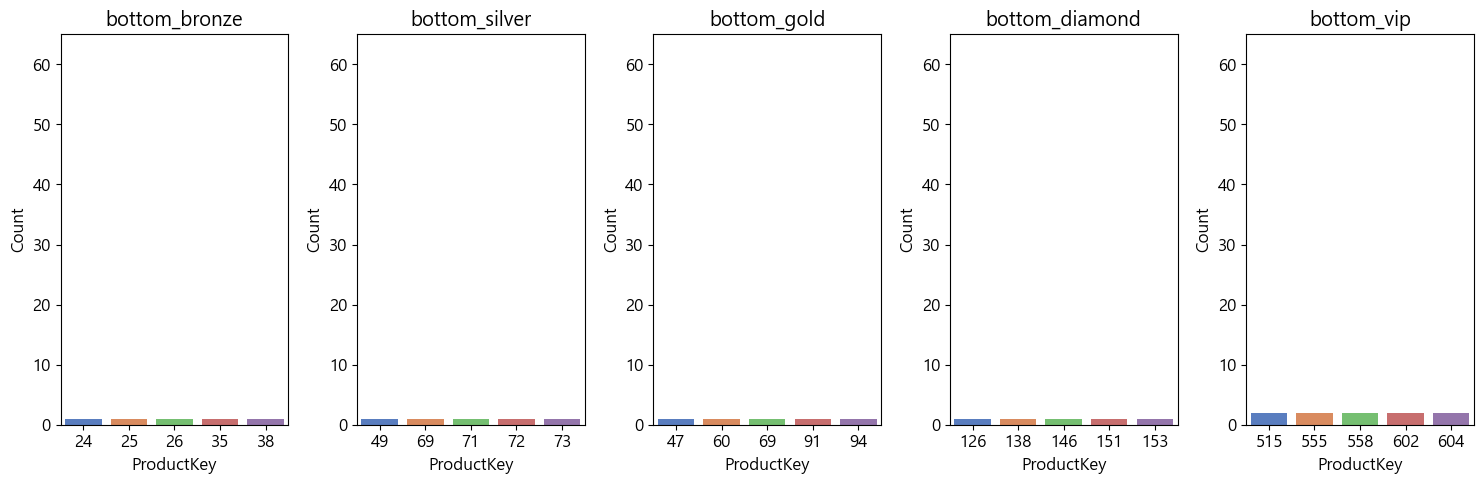

In [44]:
display(pd.concat([top_bronze_df.reset_index(drop=True), bottom_bronze_df.reset_index(drop=True)], axis=1))
display(pd.concat([top_silver_df.reset_index(drop=True), bottom_silver_df.reset_index(drop=True)], axis=1))
display(pd.concat([top_gold_df.reset_index(drop=True), bottom_gold_df.reset_index(drop=True)], axis=1))
display(pd.concat([top_diamond_df.reset_index(drop=True), bottom_diamond_df.reset_index(drop=True)], axis=1))
display(pd.concat([top_vip_df.reset_index(drop=True), bottom_vip_df.reset_index(drop=True)], axis=1))

# 등급 별 상위 5개 상품 도식화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

sns.barplot(ax=axes[0], x='ProductKey', y='ProductKeyCount', data=top_bronze_df, palette='muted')
axes[0].set_title('top_bronze')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, 65)
sns.barplot(ax=axes[1], x='ProductKey', y='ProductKeyCount', data=top_silver_df, palette='muted')
axes[1].set_title('top_silver')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, 65)
sns.barplot(ax=axes[2], x='ProductKey', y='ProductKeyCount', data=top_gold_df, palette='muted')
axes[2].set_title('top_gold')
axes[2].set_ylabel('Count')
axes[2].set_ylim(0, 65)
sns.barplot(ax=axes[3], x='ProductKey', y='ProductKeyCount', data=top_diamond_df, palette='muted')
axes[3].set_title('top_diamond')
axes[3].set_ylabel('Count')
axes[3].set_ylim(0, 65)
sns.barplot(ax=axes[4], x='ProductKey', y='ProductKeyCount', data=top_vip_df, palette='muted')
axes[4].set_title('top_vip')
axes[4].set_ylabel('Count')
axes[4].set_ylim(0, 65)

plt.tight_layout()
plt.show()

# 등급 별 상위 5개 상품 도식화
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

sns.barplot(ax=axes[0], x='ProductKey', y='ProductKeyCount', data=bottom_bronze_df, palette='muted')
axes[0].set_title('bottom_bronze')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, 65)
sns.barplot(ax=axes[1], x='ProductKey', y='ProductKeyCount', data=bottom_silver_df, palette='muted')
axes[1].set_title('bottom_silver')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, 65)
sns.barplot(ax=axes[2], x='ProductKey', y='ProductKeyCount', data=bottom_gold_df, palette='muted')
axes[2].set_title('bottom_gold')
axes[2].set_ylabel('Count')
axes[2].set_ylim(0, 65)
sns.barplot(ax=axes[3], x='ProductKey', y='ProductKeyCount', data=bottom_diamond_df, palette='muted')
axes[3].set_title('bottom_diamond')
axes[3].set_ylabel('Count')
axes[3].set_ylim(0, 65)
sns.barplot(ax=axes[4], x='ProductKey', y='ProductKeyCount', data=bottom_vip_df, palette='muted')
axes[4].set_title('bottom_vip')
axes[4].set_ylabel('Count')
axes[4].set_ylim(0, 65)

plt.tight_layout()
plt.show()

#### 💡 분석
- 전체 상품 중 가장 인기 있는 상품은 16번으로 82개가 판매되었다.
- Bronze 등급에서 가장 인기 있는 상품은 274번으로 9개가 판매되었다.
- Silver 등급에서 가장 인기 있는 상품은 86번으로 10개가 판매되었다.
- Gold 등급에서 가장 인기 있는 상품은 63번으로 13개가 판매되었다.
- Diamond 등급에서 가장 인기 있는 상품은 170번으로 15개가 판매되었다.
- VIP 등급에서 가장 인기 있는 상품은 40번으로 64개가 판매되었다.

#### 📌 시사점
- 전체 상품 중 가장 판매량이 높은 상위 2개 상품은 VIP 등급에서만 약 75~78% 비율을 차지함. 인기 상품은 VIP 비중이 큼.- 
등급 별 인기 있는 상품의 품목이 모두 다른 것으로 나타남. 각 등급별 구매율이 높은 제품에 대한 마케팅 전략이 필요함.

#### 📊 등급 별 활동성

In [45]:
recently_date_df = round(sa_new_df.groupby('Level')['RecentlyDate'].mean().reset_index(), 2)
recently_date_df

,Level,RecentlyDate
0,Bronze,315.41
1,Diamond,53.51
2,Gold,102.80
3,Silver,175.66
4,VIP,13.19


<Axes: xlabel='Level', ylabel='RecentlyDate'>

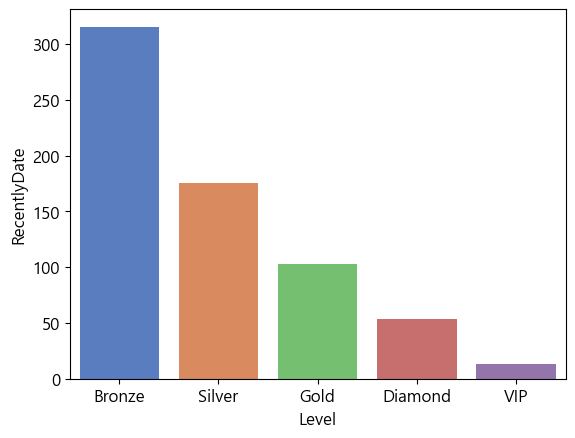

In [46]:
level_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 수량 데이터(측정 가능) 데이터이기 때문에 barplot를 사용
sns.barplot(x='Level', y='RecentlyDate', data=recently_date_df, palette='muted', order=level_columns)

#### 📊 등급 별 활동성

In [47]:
# 동일한 범위에서 정확한 분석을 위해 등급별 매출액, 인원수, 활동성으로 정규화 진행

# 등급 별 인원수를 구해 새로운 데이터 프레임에 담기
level_counts = sa_new_df['Level'].value_counts().reset_index()

# 활동성 평균 데이터 추가
level_recently = sa_new_df.groupby('Level')['RecentlyDate'].mean().reset_index()

# 총 매출액 데이터 추가
level_pirce = level_price_df.copy()
level_pirce = level_pirce.drop(labels=['CustomerKey', 'RecentlyDate', 'OrderCount', 'TotalScore'], axis=1)

# 데이터 프레임 합치기
merged_df = pd.merge(level_counts, level_recently, on='Level')
merged_df = pd.merge(merged_df, level_pirce, on='Level')
merged_df

# level 피처 삭제
rfm = merged_df.drop(labels=['Level'], axis=1)
display(rfm)

# 정규화 진행
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(rfm)

,count,RecentlyDate,TotalPirce
0,5376,315.410900,2627358.76
1,4479,102.798392,4006525.47
2,3587,53.508503,10811722.95
3,3583,175.660620,2799861.19
4,893,13.191489,9062368.89


In [48]:
# 정규화된 데이터 데이터 프레임으로 변환
rfm = pd.DataFrame(rfm_normalization, columns=rfm.columns)

# 레벨 피처 추가
rfm['Level'] = merged_df['Level']

# recently_mean_date는 현재 낮을 수록 최신에 가깝고, 최신 점수가 더 높아야 하기 때문에 1을 빼서 점수를 높여준다.
rfm['RecentlyDate'] = 1 - rfm['RecentlyDate']

# 등급 값 추가
rfm['PriceTotalScore'] = rfm[['count', 'TotalPirce', 'RecentlyDate']].sum(axis=1)
# # 등급 값만 필요하므로 사용이 완료된 피처 삭제
rfm = rfm.drop(labels=['count', 'TotalPirce', 'RecentlyDate'], axis=1)
rfm

,Level,PriceTotalScore
0,Bronze,1.000000
1,Gold,1.671927
2,Diamond,2.467534
3,Silver,1.083535
4,VIP,1.786257


<Axes: xlabel='Level', ylabel='PriceTotalScore'>

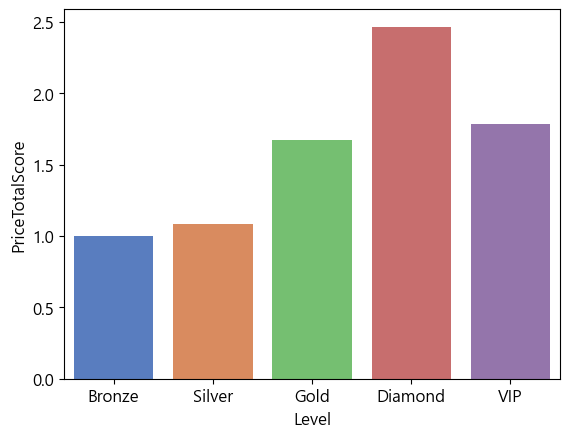

In [49]:
level_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 수량 데이터(측정 가능) 데이터이기 때문에 barplot를 사용
sns.barplot(x='Level', y='PriceTotalScore', data=rfm, palette='muted', order=level_columns)

#### 💡 분석
- Diamond 고객의 활동성이 가장 높고, Bronze 고객의 활동성 가장 낮음.

#### 📌 시사점
- Bronze 고객이 가장 많음에도 활동성이 가장 낮게 나오는 것으로 보아 라이트 구매자가 많다고 판단됨. Bronze 고객의 구매를 촉진하기 위해 마케팅 전략이 필요함.
- 매출액의 높은 부분을 차지하고 있는 Diamond, VIP 고객의 활동성이 높게 나와 해당 고객들을 위한 마케팅이 잘 추진되고 있다고 판단됨.
  하지만, Diamond, VIP 고객이 이탈하게 될 시 총 매출액에 큰 손실이있을 것이라 판단됨. 해당 고객의 유지를 위한 마케팅 전략이 필요함.

In [50]:
merged_date_four_df = round(merged_date_df.groupby('Date')['NetProfit'].mean(), 2).reset_index()
merged_date_four_df

,Date,NetProfit
0,2014-01-01,207.50
1,2014-01-02,186.65
2,2014-01-03,103.72
3,2014-01-04,77.25
4,2014-01-05,56.59
...,...,...
1068,2016-12-26,1051.29
1069,2016-12-27,1029.81
1070,2016-12-28,1038.43
1071,2016-12-29,1051.79


In [51]:
# 날짜를 연도와 분기로 변환하는 함수 정의
def get_year_quarter(date):
    year = date.year
    month = date.month
    quarter = (month - 1) // 3 + 1
    return f"{year}년 {quarter}분기"

In [52]:
# Date 컬럼을 datetime 형식으로 변환
merged_date_four_df['Date'] = pd.to_datetime(merged_date_four_df['Date'])

# 분기 컬럼 추가
merged_date_four_df['YearQuarter'] = merged_date_four_df['Date'].apply(get_year_quarter)

merged_date_four_df = merged_date_four_df.drop(labels='Date', axis=1)

merged_date_four_df = round(merged_date_four_df.groupby('YearQuarter')['NetProfit'].mean().reset_index(), 2)
merged_date_four_df

,YearQuarter,NetProfit
0,2014년 1분기,133.40
1,2014년 2분기,131.14
2,2014년 3분기,101.68
3,2014년 4분기,122.66
4,2015년 1분기,119.04
5,2015년 2분기,120.98
6,2015년 3분기,131.49
7,2015년 4분기,107.97
8,2016년 1분기,112.20
9,2016년 2분기,104.24


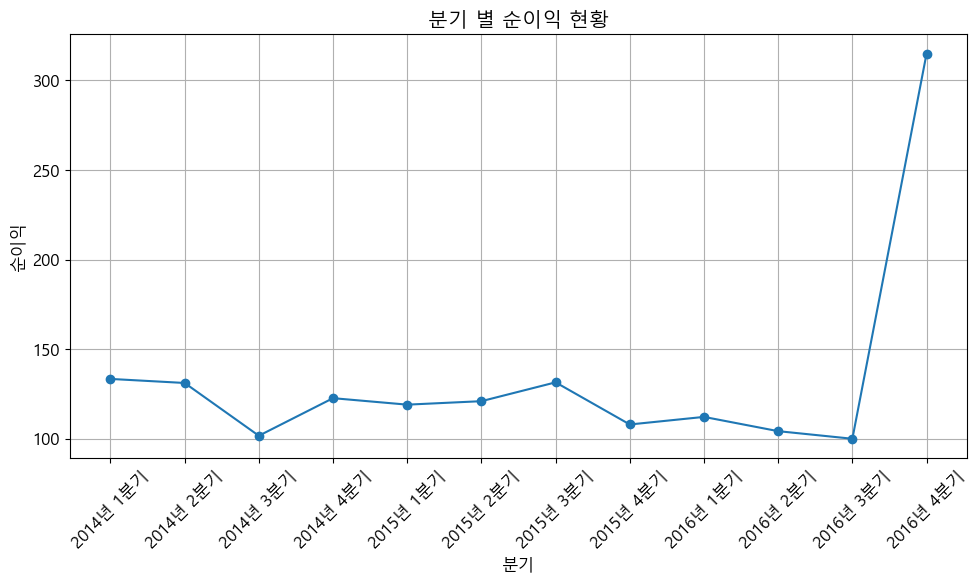

In [53]:
# 시계열 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(merged_date_four_df['YearQuarter'], merged_date_four_df['NetProfit'], marker='o', linestyle='-')
plt.title('분기 별 순이익 현황')
plt.xlabel('분기')
plt.ylabel('순이익')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### 💡 분석
- 2016년 4분기 매출액이 315.00달러로 모든 분기 중 가장 높은 매출액을 달성함.

#### 📌 시사점
- 2016년 4분기에 갑자기 매출액이 이전보다 3배 정도 늘어난 것을 확인할 수 있음. 이 기간에 진행된 마케팅 방식이 제대로 추진되었다고 판단되며, 추후 진행될 마케팅에서 해당 마케팅 방식을 차용하여 진행할 수 있음.

### Ⅴ. 마케팅 전략 제안

1. Bronze 관리 강화 전략
> R(recency)가 낮은 구매를 높이기 위한 혜택 및 프로모션을 진행하여 구매를 유도한다.

2. 매출액이 낮은 등급의 구매 유도 전략
> F(Frequency) 및 M(Monetary)를 증대하기 위해 해당 등급에서 수요가 있는 상품을 개선/개발하여 더 다양한 선택지를 제공하여 구매를 유도한다.

3. Diamond, VIP 고객 유지 전략
> F(Frequency) 및 M(Monetary)를 증대하기 위해 Diamond, VIP 고객 수요가 있는 상품을 개선/개발하여 더 다양한 선택지를 제공하여 구매를 유도한다. R(recency)를 유지하기 위해 Diamond, VIP만의 프리미엄한 혜택을 제공하여 고객의 만족도를 높이고 이탈을 방지한다.

4. 각 등급에 따른 혜택 제공
> R(recency)를 유지하고 F(Frequency)를 증대하기 위해 각 등급에 따른 할인 혹은 혜택을 제공하여, 고객의 만족도를 높이고 이탈을 방지한다.

5. 상품별 마케팅 전략
> F(Frequency) 및 M(Monetary)를 증대하기 위해 수요가 높은 상품을 개선/개발하여 더 다양한 선택지를 제공하고, 인기 상품의 프로모션 진행으로 구매를 촉진한다. 또, 유명 운동선수 및 인플루언서 홍보를 통해 상품 구매를 유도한다.

6. 이탈 고객 대상 마케팅 전략
> R(recency)가 낮아 이탈 가능성이 높은 등급을 대상으로한 특별한 프로모션을 진행한다.  
> SMS, 이메일 등으로 다양한 혜택을 제공하며 이탈을 방지한다.

7. 대륙 별 트렌드에 맞는 마케팅 전략
> F(Frequency) 및 M(Monetary)를 제품을 개선/개발하여 더 다양한 선택지를 제공하고, 인기 상품의 프로모션 진행으로 구매를 촉진한다. 또, 다양한 국가의 고객을 유치하여 R(recency)를 높이기 위해 맞춤형 광고를 제작하여 홍보를 강화하는 등 신규 고객 유치를 위한 마케팅 방안을 마련한다.

8. 매출액이 높았던 분기의 마케팅 전략 차용
> 매출액이 높았던 분기의 마케팅 전략을 차용 및 고도화하여 F(Frequency) 및 M(Monetary)를 유지하고 증대할 수 있도록 한다.